In [4]:
#importing of libraries

#Basic libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

#To ignore warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
#loading the data
df = pd.read_csv('C:/Users/tejad/OneDrive/Desktop/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#checking the shape
df.shape

(284807, 31)

In [7]:
#checking the null values if present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#checking the numerical value
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#checking the class distribution of the target variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

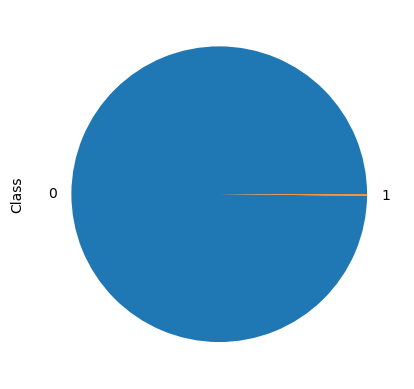

In [10]:
#checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [11]:
#checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


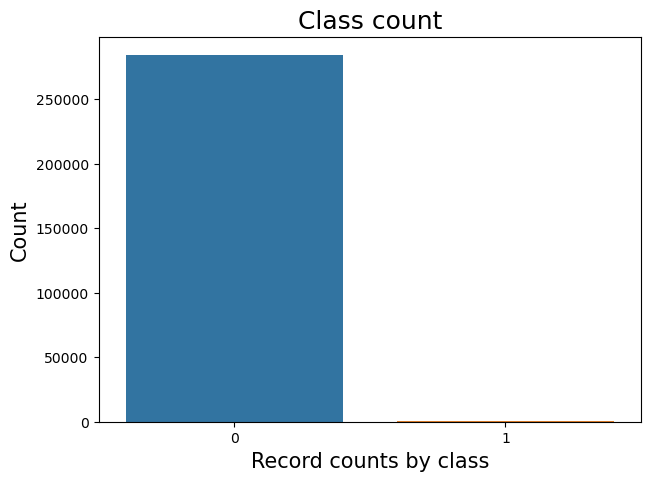

In [12]:
#creat a bar plot for the number and percentage of fraud vs non-fraud cases
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [13]:
#Checking the correlation
corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<function matplotlib.pyplot.show(close=None, block=None)>

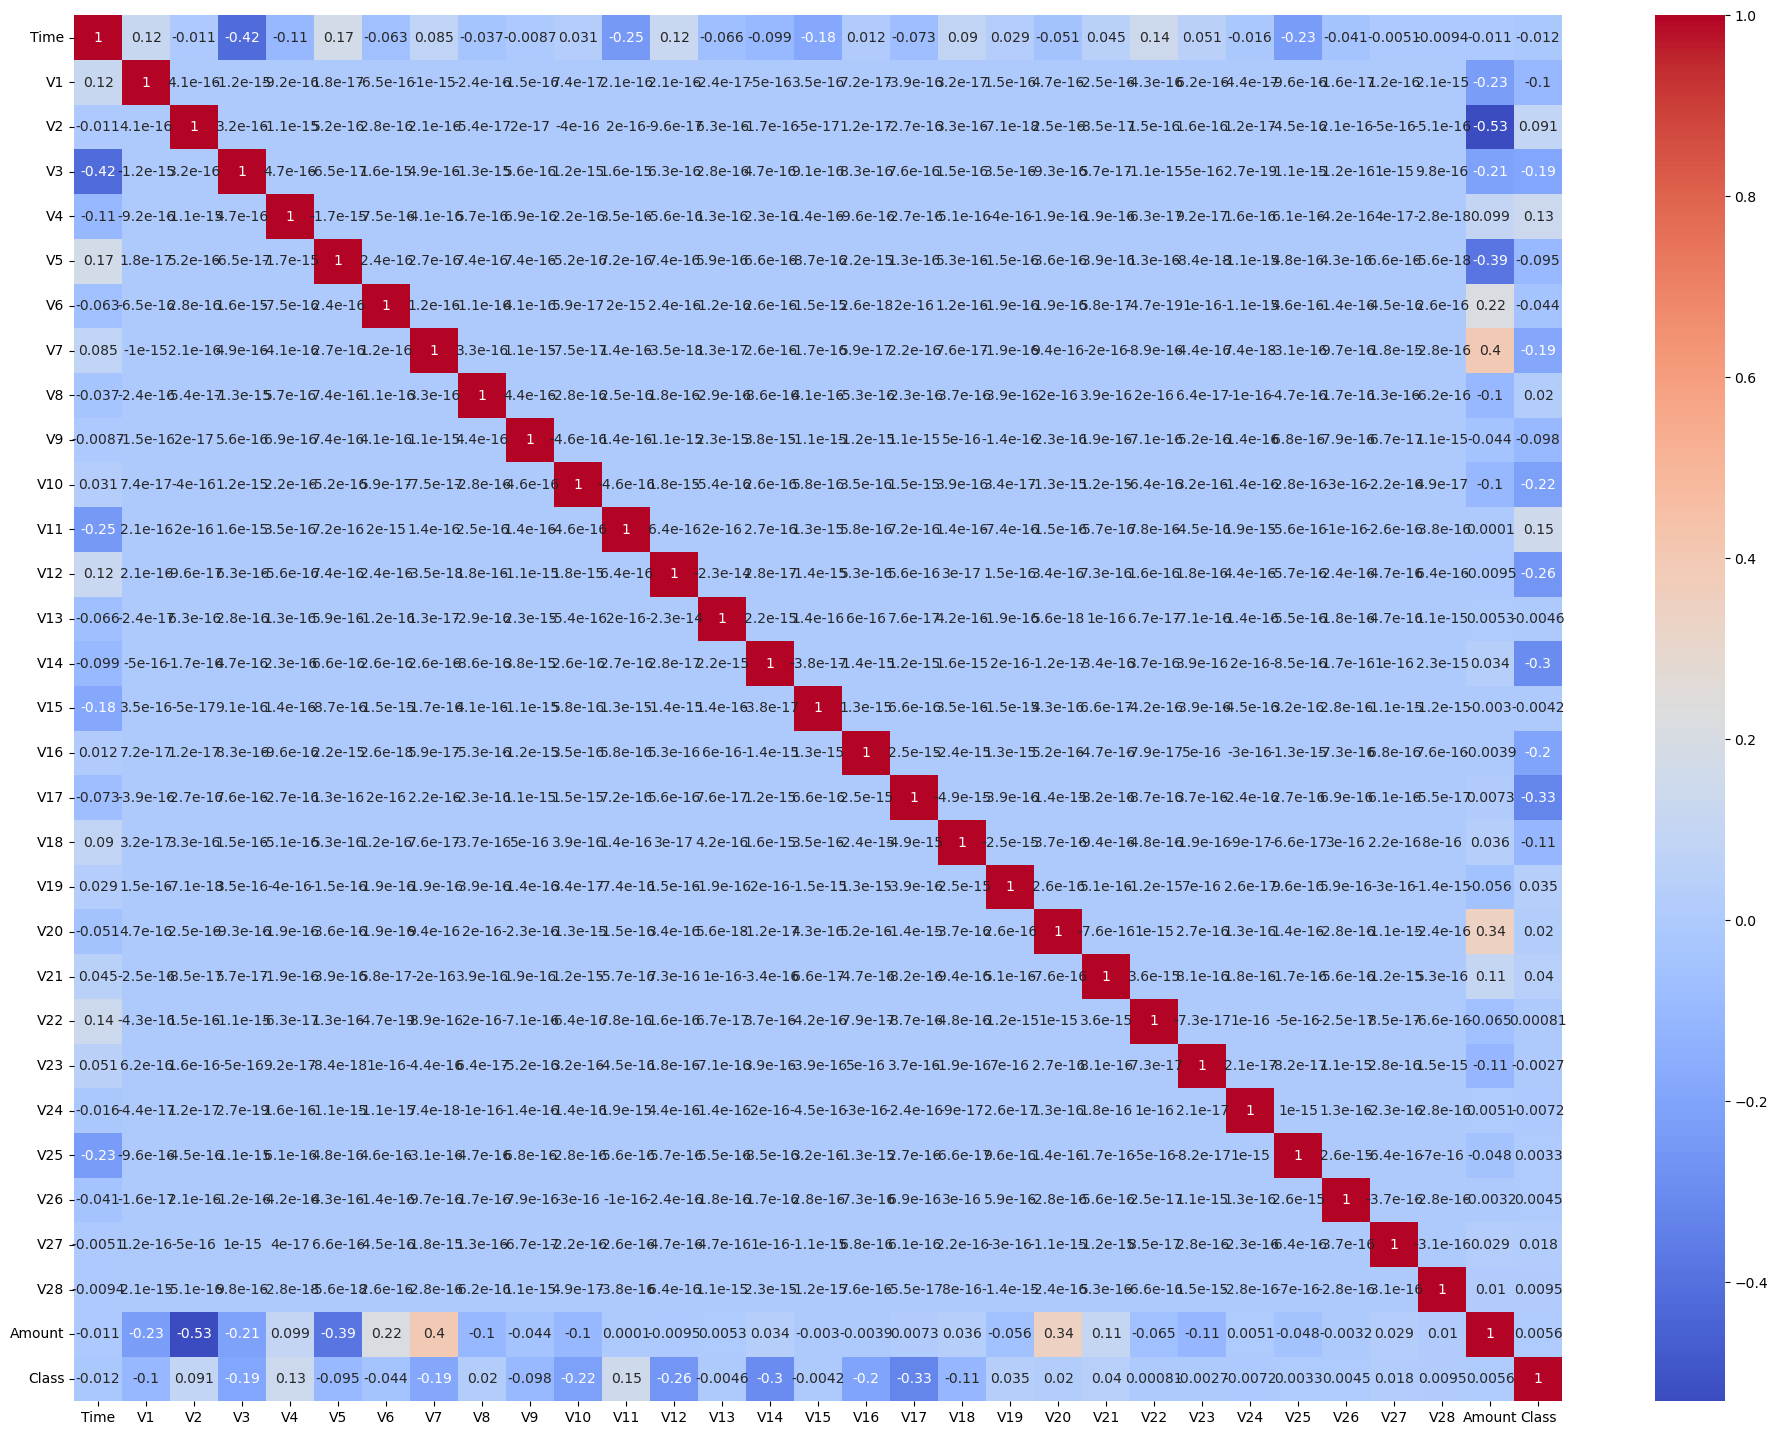

In [14]:
#checking for the correlation in heatamp
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show

In [15]:
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#creating derived columns mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hours'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.days).astype(int)

In [16]:
#Drop unnecessary columns
#drop time as we have derived the required details

df.drop('Time', axis = 1, inplace=True)

#only keeping hour
df.drop(['Time_Day','Time_Min'],axis = 1, inplace=True)

In [17]:
#splitting into test and tranning data set (x and y)
y= df['Class']
x= df.drop(['Class'], axis=1)

In [18]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hours
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.20)

In [21]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [22]:
#accumulating all the column names under one variable
cols = list(x.columns.values)

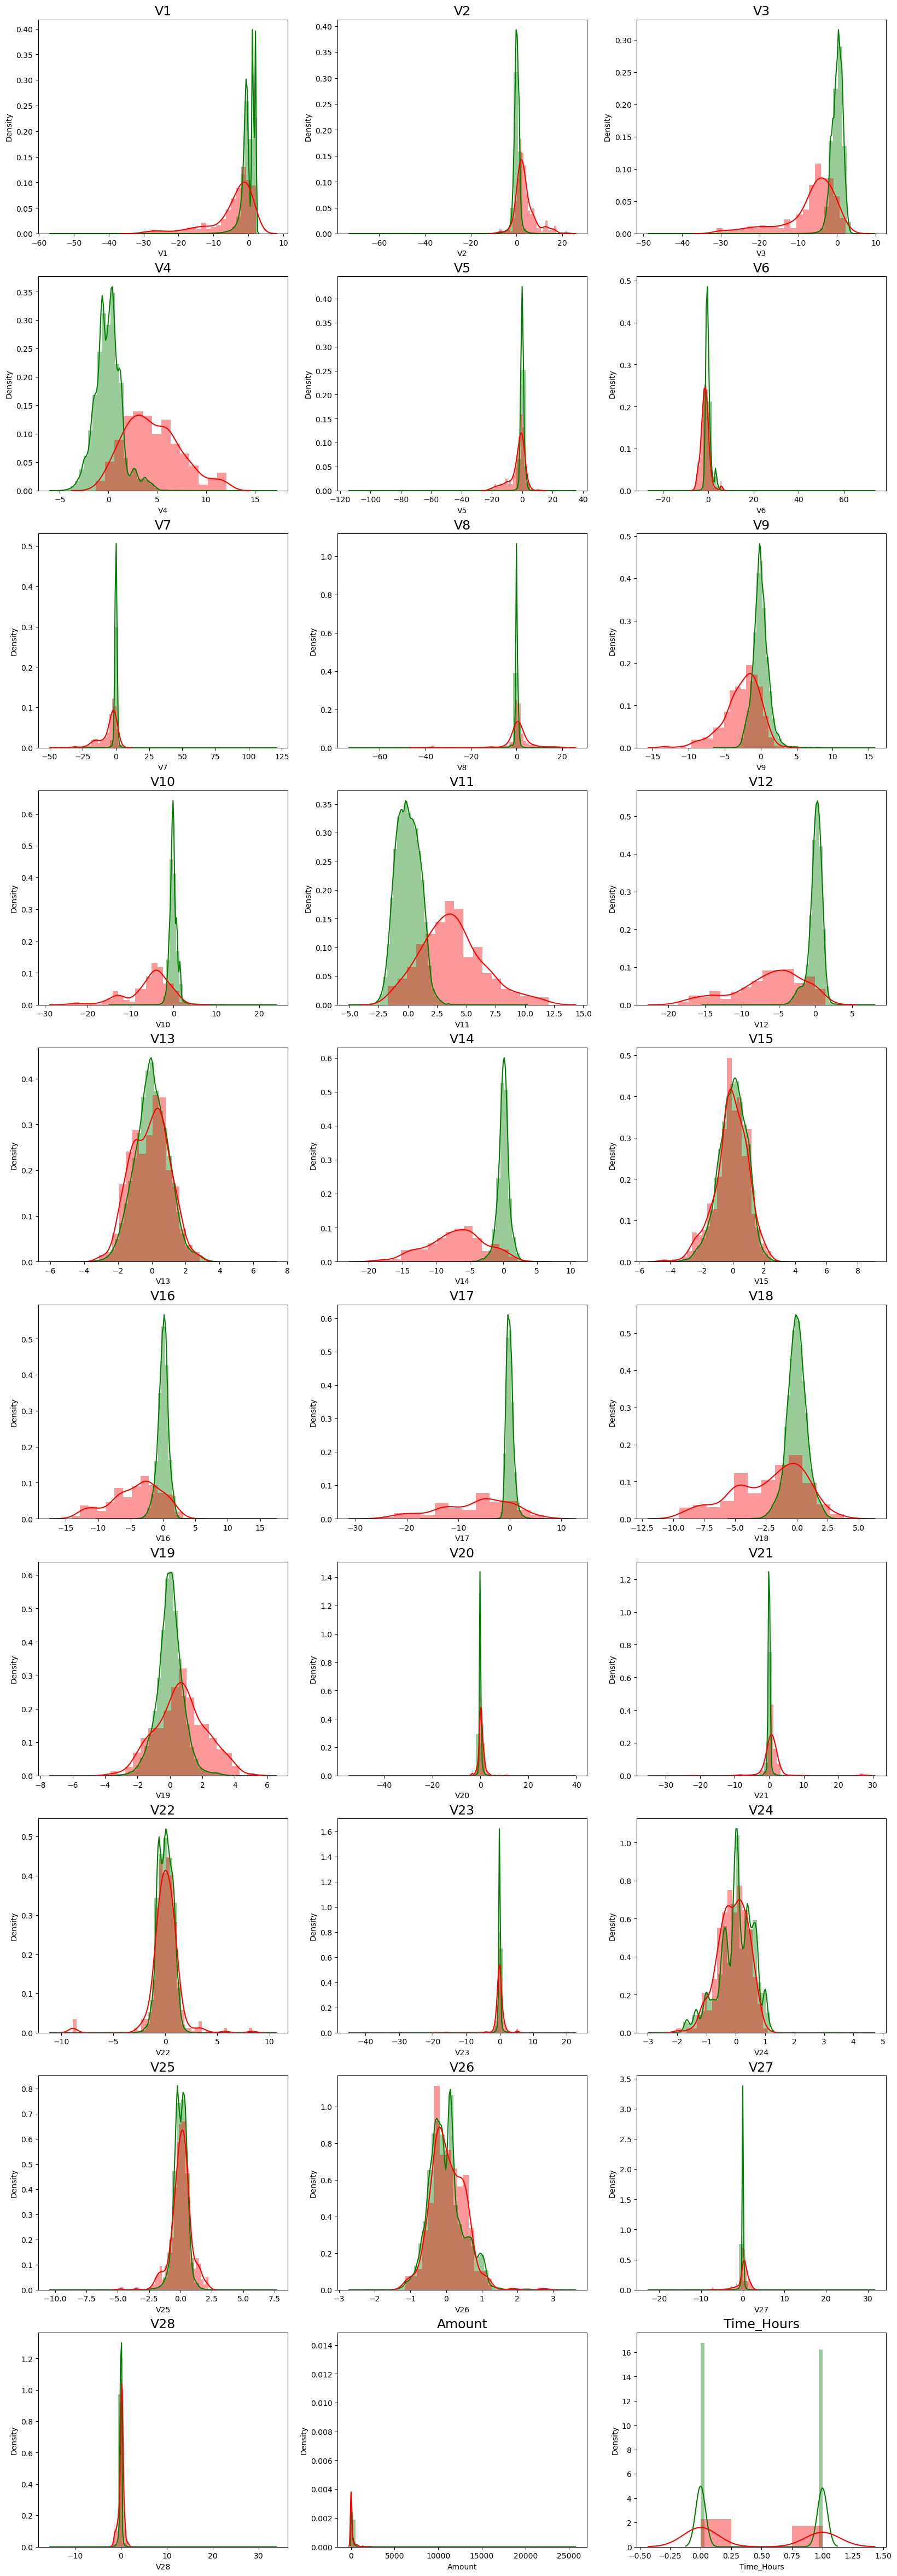

In [21]:
#plot of histogram 
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(x[col][normal_records], color='green')
    sns.distplot(x[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
    
plt.show()    

In [33]:
#created a dataframe to store results
df_Results = pd.DataFrame(columns=['Methology','Model', 'Accuracy', 'roc_value', 'threshold'])

In [53]:
#Created a common function for Confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudalent','Fraudalent']
    plt.title('Confusion_Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN','TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
            
    plt.show()

In [63]:
# created a common functi9on to fit and predict on a logistic regression model for both l1 and l2
def buildAndRunLogisticModels(df_Results, Methodology, x_train, y_train, x_test, y_test):
    #logistic regression
    from sklearn import linear_model
    from sklearn.model_selection import KFold 
    
    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)
    
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs= num_C
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=cv_num
        ,random_state=42
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10
        )
    
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs= num_C
        ,penalty='l1'
        ,scoring='roc_auc'
        ,cv=cv_num
        ,random_state=42
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='liblinear'
        ,tol=10
        )
    searchCV_l1.fit(x_train, y_train)
    searchCV_l2.fit(x_train, y_train)
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
    
    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)
    
    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)
    
    #find the predicted value
    y_pred_l1 = searchCV_l1.predict(x_test)
    y_pred_l2 = searchCV_l2.predict(x_test)
    
    #find the predicted probablities
    y_pred_probs_l1 = searchCV_l1.predict_proba(x_test)[:,1]
    y_pred_probs_l2 = searchCV_l2.predict_proba(x_test)[:,1]
    
    #accuaracy of l2/l1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)
    
    print("Accuarcy of logistic model with l2 regulation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_12))
    
    print("Accuarcy of logistic model with l1 regulation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))
    
    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'Logistic Regression with L2 Regulation','Accuracy':Accuracy_l2,'roc_value':l2_roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    
    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'Logistic Regression with L1 Regulation','Accuracy':Accuracy_l1,'roc_value':l1_roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    return df_Results

In [55]:
#creating a common function for KNN model
def buildAndRunKNNModels(df_Results,Methodology, x_train,y_train, x_test, y_test):
    #create KNN model fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
    knn.fit(x_train, y_train)
    print("model score")
    print(score)
    
    #accuracy
    y_pred = knn.predict(x_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    knn_probs = knn.predict_proba(x_test)[:,1]
    
    #calculate auc_roc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}".format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'KNN','Accuracy':score,'roc_value':knn_roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    
    return df_Results

In [56]:
#creating a common function for TREE model for both gini and entropy criteria
def buildAndRunTreeModels(df_Results,Methodology, x_train,y_train, x_test, y_test):
    #evaluate tree model based on 'gini' and 'entropy'
    criteria = ['gini','entropy']
    scores = {}
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c, random_state=42)
        dt.fit(x_train, y_train)
        y_pred = dt.predict(x_test)
        test_score = dt.score(x_test, y_test)
        tree_preds = dt.predict_proba(x_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score
        print(c + "score: {0}".format(test_score))
        print("Confusion matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report")
        print(classification_report(y_test, y_pred))
        print(c + "tree_roc_value: {0}".format(test_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_probs)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
        plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
        df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy':test_score,'roc_value':tree_roc_value,'threshold':threshold},index=[0]),ignore_index=True)

    return df_Results

In [57]:
#creating a common function for Random forest model 
def buildAndRunRandomForestModels(df_Results,Methodology, x_train,y_train, x_test, y_test):
    #evaluate random forest model 
    
    #create a mdel with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100,
                                     bootstrap = True,
                                     max_features = 'sqrt', random_state=42)
    
    #fit on tranning dataset
    RF_model.fit(x_train, y_train)
    RF_test_score = RF_model.score(x_test, y_test)
    RF_model.predict(x_test)
    
    print('Model Accuracy: {0}'.format(RF_test_score))
    
    #Actual Class Prediction
    rf_predictions = RF_model.predict(x_test)
    
    print("Confusion matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("Classification Report")
    print(classification_report(y_test, rf_predictions))
    
    #probabilities for each class
    rf_probs = RF_model.predict_proba(x_test)[:, 1]
    
    #calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)
    
    print("Random Forest roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'Random Forest','Accuracy':RF_test_score,'roc_value':roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    
    return df_Results

In [58]:
#creating a common function for XGBoost model 
def buildAndRunXGBoostModels(df_Results,Methodology, x_train,y_train, x_test, y_test):
    #evaluate XGBoost model 
    
    XGBmodel = XGBClassifier(random_state=42)
    
    #fit on tranning dataset
    XGBmodel.fit(x_train, y_train)
    y_pred = XGBmodel.predict(x_test)
    XGB_test_score = XGBmodel.score(x_test, y_test)
    
    print('Model Accuracy: {0}'.format(XGB_test_score))
    
    print("Confusion matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    #probabilities for each class
    XGB_probs = XGBmodel.predict_proba(x_test)[:, 1]
    
    #calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    
    print("XGBoost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'XGBoost','Accuracy':XGB_test_score,'roc_value':XGB_roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    
    return df_Results

In [59]:
#creating a common function for SVM model 
def buildAndRunSVMModels(df_Results,Methodology, x_train,y_train, x_test, y_test):
    #evaluate SVM model with sigmoid kernel model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score
    
    clf = SVC(kernel = 'sigmoid', random_state=42)
    clf.fit(x_train, y_train)
    y_pred_SVM = clf.predict(x_test)
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    
    print('accuracy_score: {0}'.format(SVM_Score))
    
    print("Confusion matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("Classification Report")
    print(classification_report(y_test, y_pred_SVM))
    
    #run classifier
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(x_train, y_train).predict_proba(x_test)[:, 1]
    
    #calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
    
    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'SVM','Accuracy':SVM_Score,'roc_value':roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    
    return df_Results
    
    

In [60]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
for train_index, test_index in rkf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_cv, x_test_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284802 284803 284806] TEST: [     3      5     21 ... 284798 284804 284805]
TRAIN: [     0      2      3 ... 284802 284804 284805] TEST: [     1      8     10 ... 284794 284803 284806]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      9     16 ... 284795 284799 284800]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0     13     15 ... 284793 284801 284802]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     4      6      7 ... 284788 284792 284796]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     6      8     13 ... 284784 284787 284805]
TRAIN: [     2      3      4 ... 284804 284805 284806] TEST: [     0      1     10 ... 284794 284799 284802]
TRAIN: [     0      1      2 ... 284802 284803 284805] TEST: [     3      9     15 ... 284801 284804 284806]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      4     11 ... 284789 284793 284797]
TRAIN: [     0     

logistic regresssion with li and l2 regulation
Max auc_roc for l1: 0.9740856660828443
Max auc_roc for l2: 0.9812257103234673
Parameters for l1 regularisations
[[ 0.00209546 -0.12470116 -0.4368522   0.03349471 -0.17141665  0.05177241
   0.18461605 -0.07837426 -0.05242386 -0.1487693  -0.12097087 -0.14454967
   0.00330207 -0.16462369 -0.16535649 -0.11063949 -0.22912805  0.15622856
   0.00287374  0.16785025  0.1806629   0.09621734  0.13574628 -0.01980134
  -0.27064368 -0.0131459  -0.036198    0.01708427 -0.00635591 -1.9561233 ]]
[-2.82897152]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.59441163,
        0.59441163, 0.59441163, 0.87963698, 0.96370916, 0.954581  ,
        0.94456947, 0.95140986, 0.9645715 , 0.95892328, 0.96173305,
        0.96773978, 0.94982094, 0.96745679, 0.95792519, 0.96681243],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.45162331,
        0.45162331, 0.45162331, 0.74182702, 0.93136314, 0.94166995,
        0.89430137, 0.88375931, 0.91714032

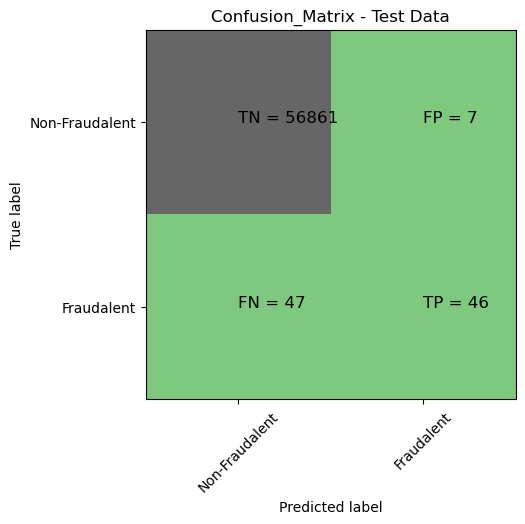

classification Report


NameError: name 'y_pred_12' is not defined

In [61]:
print("logistic regresssion with li and l2 regulation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("Decision tree model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("random forest model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("XGBoost model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("SVM Model")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

In [ ]:
df_Results

In [23]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
for train_index, test_index in skf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_SKF_cv, x_test_SKF_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


In [ ]:
print("logistic regresssion with li and l2 regulation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("Decision tree model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("random forest model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("XGBoost model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("SVM Model")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

In [ ]:
df_Results

In [26]:

from sklearn.model_selection import StratifiedKFold
from imblearn import under_sampling, over_sampling

from imblearn.over_sampling import RandomOverSampler
skf = StratifiedKFold(n_splits=5, random_state=None)
for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index]
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]
    ROS= RandomOverSampler (sampling_strategy=0.5)
    x_over, y_over = ROS.fit_resample(x_train, y_train)
x_over = pd.DataFrame(data=x_over, columns=cols)

In [62]:
Data_Imbalance_Handiling = "Random Over sampling with StratifiedKfold CV"
print("logistic regresssion with li and l2 regulation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,Data_Imbalance_Handiling, x_over, y_over, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,Data_Imbalance_Handiling, x_over, y_over, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("Decision tree model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,Data_Imbalance_Handiling, x_over, y_over, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("random forest model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,Data_Imbalance_Handiling, x_over, y_over, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("XGBoost model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,Data_Imbalance_Handiling, x_over, y_over, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)


logistic regresssion with li and l2 regulation


NameError: name 'x_over' is not defined

In [ ]:
df_Results

In [33]:
from sklearn.model_selection import StratifiedKFold
from imblearn import under_sampling, over_sampling

from imblearn.over_sampling import RandomOverSampler
skf = StratifiedKFold(n_splits=5, random_state=None)
for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index]
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    x_train_Smote,y_train_Smote= SMOTE.fit_resample(x_train,y_train) 
    

x_train_Smote=pd.DataFrame(data=x_train_Smote, columns=cols)

In [ ]:
Data_Imbalance_Handiling = "SMOTE"
print("logistic regresssion with l1 and l2 regulation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,Data_Imbalance_Handiling, x_train_Smote, y_train_Smote, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,Data_Imbalance_Handiling,  x_train_Smote, y_train_Smote, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("Decision tree model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,Data_Imbalance_Handiling, x_train_Smote, y_train_Smote, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("random forest model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,Data_Imbalance_Handiling x_train_Smote, y_train_Smote, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("XGBoost model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,Data_Imbalance_Handiling, x_train_Smote, y_train_Smote, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)



In [ ]:
df_Results

In [23]:
from sklearn.model_selection import StratifiedKFold 
from imblearn import over_sampling
skf = StratifiedKFold (n_splits=5, random_state=None)
for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train= y.loc[train_index]
    x_test= x.loc[test_index]
    y_test= y.loc[test_index]
    ADASYN = over_sampling.ADASYN(random_state=0)
    x_train_ADASYN, y_train_ADASYN=ADASYN. fit_resample(x_train, y_train)
x_train_ADASYN = pd.DataFrame(data=x_train_ADASYN, columns=cols)

In [ ]:
Data_Imbalance_Handiling = "SMOTE"
print("logistic regresssion with l1 and l2 regulation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,Data_Imbalance_Handiling,x_train_ADASYN, y_train_ADASYN, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,Data_Imbalance_Handiling,  x_train_ADASYN, y_train_ADASYN, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("Decision tree model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,Data_Imbalance_Handiling, x_train_ADASYN, y_train_ADASYN, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("random forest model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,Data_Imbalance_Handiling,x_train_ADASYN, y_train_ADASYN, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("XGBoost model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,Data_Imbalance_Handiling,x_train_ADASYN, y_train_ADASYN, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

In [ ]:
df_Results